# แบบทดสอบชุดนี้ทดสอบทักษะการเขียนโปรแกรมสำหรับสำรวจข้อมูลเบื้องต้น โดยใช้ข้อมูลภาพถ่ายทางการแพทย์ที่เรียกว่า Magnetic Resonance Imaging (MRI)

ข้อกำหนดเบื้องต้น
1.  ผู้เข้าทดสอบสามารถแก้ข้อมูลใน cell ที่มี comments เขียนไว้ว่า **"ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้"** เท่านั้น
2.  ผู้เข้าทดสอบควรเขียน comments กำกับไว้ตามความเหมาะสม เพื่อให้ผู้อื่นสามารถเข้าใจโค้ดที่เขียนมาได้ง่ายขึ้น โดยเขียนเป็นภาษาไทยหรือภาษาอังกฤษก็ได้
3.  อาจมีวิธีใช้แก้ปัญหาในแบบทดสอบได้หลายวิธี ทีมงานอนุญาตให้ผู้เข้าทดสอบสามารถเลือกใช้วิธีใดก็ได้


ในการตรวจให้คะแนน มีรายละเอียดเบื้องต้นดังนี้

1.  ให้คะแนนตามความถูกต้องของคำตอบ
2.  ถ้าหากโค้ดในส่วนใดรันไม่ได้ หรือมี error จะได้คะแนนในส่วนนั้นเป็น 0 ทันที
3.  การเขียนโค้ดที่เข้าใจง่าย เช่น การเขียน comments ประกอบกับโค้ดตามความเหมาะสม และ การใช้ชื่อ variable ที่เข้าใจง่าย เป็นทักษะที่สำคัญ ซึ่งอาจจะถูกนำมาพิจารณาเวลาตรวจให้คะแนน

**สำคัญ** ตรวจสอบให้มั่นใจว่าทีมงานสามารถรันทั้งไฟล์ (เช่น การกด tab ใน Google Colab ที่ชื่อว่า Runtime -> Restart and run all) ได้โดยไม่ติด error ใด ๆ
*   ถ้าหากพบ error ที่ cell ไหน cell นั้นและ cell หลังจากนั้นทั้งหมด จะได้รับคะแนนเป็น 0 ทันที
    * error ในที่นี้ รวมถึง ModuleNotFoundError ด้วย ดังนั้น อย่าลืม import modules ที่ใช้มาด้วย


**หมายเหตุ** ผู้เข้าทดสอบควรผ่านการเรียนรู้ [เนื้อหา Brain Building Blocks](https://course2024-braincodecamp.web.app/Prereqs/BrainBuildingBlocks/BBB.html) จากแพลตฟอร์ม Brain Code Camp มาแล้ว โดยเฉพาะ Session ที่ 6 และ 7



Part 1: Data Exploration on the First Human Subject
---

Import modules ที่สำคัญเบื้องต้น

In [1]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio # สามารถใช้ในการ download ไฟล์ประเภท .mat ได้

ใช้คำสั่ง `wget` ทำการ download ไฟล์ MATLAB ที่มีชื่อว่า `subject1.mat` ซึ่งเป็นข้อมูลภาพสมองที่เก็บมาจากเครื่อง MRI

**หมายเหตุ** ทีมงานต้องการให้ท่านได้ฝึกลองใช้ข้อมูลประเภท .mat ดู เนื่องจากข้อมูลทาง neuroscience จำนวนมากถูกเก็บอยู่ใน format นี้

In [2]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
!wget -O subject1.mat "https://firebasestorage.googleapis.com/v0/b/braincodequiz.appspot.com/o/exams%2Fsubject1.mat?alt=media&token=ddb739ae-226d-45fd-a974-8f6aadc4e821"

--2024-07-14 03:25:26--  https://firebasestorage.googleapis.com/v0/b/braincodequiz.appspot.com/o/exams%2Fsubject1.mat?alt=media&token=ddb739ae-226d-45fd-a974-8f6aadc4e821
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 74.125.134.95, 74.125.139.95, 74.125.141.95, ...
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|74.125.134.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344000 (336K) [application/octet-stream]
Saving to: ‘subject1.mat’

subject1.mat        100%[===================>] 335.94K   357KB/s    in 0.9s    

2024-07-14 03:25:29 (357 KB/s) - ‘subject1.mat’ saved [344000/344000]



ใช้ `scipy.io.loadmat` ทำการ load ข้อมูลจาก `subject1.mat` มา
เก็บไว้ใน variable ชื่อ `temp_data` ซึ่งจะมีข้อมูล 2 อย่างประกอบด้วย (1) ภาพ MRI ของสมอง และ (2) ภาพ brain mask

In [3]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
temp_data = sio.loadmat('subject1.mat')
print(f"Type: {type(temp_data)}")

Type: <class 'dict'>


**คำสั่ง**
จงทำตามขั้นตอนต่อไปนี้
1. ดึงข้อมูลภาพ MRI ของสมองจาก `temp_data` มาเก็บไว้ใน variable ที่มีชื่อว่า `image_TSE`
2. ดึงข้อมูลภาพ brain mask จาก `temp_data` มาเก็บไว้ใน variable ที่มีชื่อว่า `brain_mask`

**คำสั่งที่อาจมีประโยชน์**: `temp_data.keys()`


หากเขียนโค้ดได้ถูกต้อง เราจะสามารถเข้าถึง variables เหล่านี้ได้

*   `image_TSE`: ข้อมูลรูปภาพสมองที่เก็บมาจากเครื่อง MRI โดยใช้เทคนิค [Turbo Spin Echo (TSE)](https://radiopaedia.org/articles/fast-spin-echo)

*  `brain_mask`: ข้อมูลรูปภาพที่บ่งบอกว่า pixel ไหนในภาพเป็น pixel ในบริเวณสมองบ้าง โดย `brain_mask` จะมีค่าเป็น 1 สำหรับทุก pixel ที่อยู่ในสมอง และมีค่าเป็น 0 สำหรับทุก pixel ที่อยู่นอกสมอง







In [4]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
image_TSE = temp_data['image']
brain_mask = temp_data['brain_mask']

ทางเจ้าหน้าที่ที่เก็บข้อมูล MRI มาให้เราแจ้งมาว่าทุก element ในข้อมูล `image_TSE` ต้องเป็นข้อมูลเชิงซ้อนประเภท complex64 และข้อมูล `brain_mask` จะเป็นข้อมูลประเภท 8-bit unsigned integer (uint8)

**คำสั่ง** เขียนโค้ดที่ print ออกมาดูว่าข้อมูลของเรามีประเภทเป็นไปตามที่เจ้าหน้าที่ได้แจ้งมา

In [5]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
print(f"Type of image: {image_TSE.dtype}")
print(f"Type of brain mask: {brain_mask.dtype}")

Type of image: complex64
Type of brain mask: uint8


นอกจากนี้ เจ้าหน้าที่ได้แจ้งมาว่าทุก element ในข้อมูล `image_TSE` และข้อมูล `brain_mask` จะมีค่า magnitude ไม่น้อยกว่า 0 และไม่มากกว่า 1

**คำสั่ง** เขียนฟังก์ชันชื่อว่า `get_min_max_magnitude` ที่รับ parameter เป็น numpy array 2 มิติ และ return ค่า maximum และ minimum ของ magnitude ของ array ตามลำดับ

**คำแนะนำ** เราสามารถใช้ `numpy.abs` ในการคำนวณค่า magnitude ได้

In [6]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
def get_min_max_magnitude(image): # ห้ามแก้บรรทัดนี้
    magnitude = np.abs(image)
    min_abs = np.min(magnitude)
    max_abs = np.max(magnitude)

    return min_abs, max_abs # ห้ามแก้บรรทัดนี้


**คำสั่ง** จงเรียกใช้ `get_min_max_magnitude`
1. เพื่อคำนวนค่า minimum ของ `image_TSE` มาเก็บไว้ใน `min_TSE`
2. เพื่อคำนวนค่า maximum ของ `image_TSE` มาเก็บไว้ใน `max_TSE`
3. เพื่อคำนวนค่า minimum ของ `brain_mask` มาเก็บไว้ใน `min_brain_mask`
4. เพื่อคำนวนค่า maximum ของ `brain_mask` มาเก็บไว้ใน `max_brain_mask`

In [7]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
min_TSE = get_min_max_magnitude(image_TSE)[0]
max_TSE = get_min_max_magnitude(image_TSE)[1]
min_brain_mask = get_min_max_magnitude(brain_mask)[0]
max_brain_mask = get_min_max_magnitude(brain_mask)[1]

# ท่านสามารถใช้โค้ดด้านล่าง เพื่อทดสอบความถูกต้องของฟังก์ชันเบื้องต้นได้
print(f"Min of magnitude of image_TSE = {min_TSE}")
print(f"Max of magnitude of image_TSE = {max_TSE}")
print(f"Min of magnitude of brain_mask = {min_brain_mask}")
print(f"Max of magnitude of brain_mask = {max_brain_mask}")

Min of magnitude of image_TSE = 0.0
Max of magnitude of image_TSE = 1.0
Min of magnitude of brain_mask = 0
Max of magnitude of brain_mask = 1


ต่อไปเราจะทำการต้องการตรวจสอบจำนวนมิติของข้อมูล `image_TSE` และข้อมูล `brain_mask`

**คำสั่ง** จงเขียนฟังก์ชัน `get_shape` ที่รับ parameter เป็น numpy array 2 มิติ และ return ค่าเป็นจำนวน rows ของ array และจำนวน columns ของ array ตามลำดับ

In [8]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้

def get_shape(image): # ห้ามแก้บรรทัดนี้
  num_rows = image.shape[0]
  num_cols = image.shape[1]
  return num_rows, num_cols # ห้ามแก้บรรทัดนี้

**คำสั่ง** จงเรียกใช้ `get_shape`
1. เพื่อคำนวนจำนวน rows ของ `image_TSE` มาเก็บไว้ใน variable ที่มีชื่อว่า `num_rows_TSE`
2. เพื่อคำนวนจำนวน columns ของ `image_TSE` มาเก็บไว้ใน variable ที่มีชื่อว่า `num_cols_TSE`
3. เพื่อคำนวนจำนวน rows ของ `brain_mask` มาเก็บไว้ใน variable ที่มีชื่อว่า `num_rows_brain_mask`
4. เพื่อคำนวนจำนวน columns ของ `brain_mask` มาเก็บไว้ใน variable ที่มีชื่อว่า `num_cols_brain_mask`

In [9]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
num_rows_TSE = get_shape(image_TSE)[0]
num_cols_TSE = get_shape(image_TSE)[1]
num_rows_brain_mask = get_shape(brain_mask)[0]
num_cols_brain_mask = get_shape(brain_mask)[1]

# ท่านสามารถใช้โค้ดด้านล่าง เพื่อทดสอบความถูกต้องของฟังก์ชันเบื้องต้นได้
print(f"# rows of image_TSE = {num_rows_TSE}")
print(f"# cols of image_TSE = {num_cols_TSE}")
print(f"# rows of brain_mask = {num_rows_brain_mask}")
print(f"# cols of brain_mask = {num_cols_brain_mask}")

# rows of image_TSE = 211
# cols of image_TSE = 181
# rows of brain_mask = 211
# cols of brain_mask = 181


รัน code ใน cell ถัดไปเพื่อดูข้อมูลภาพ

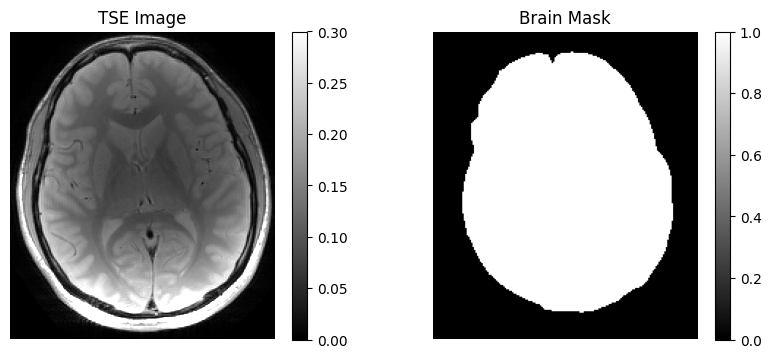

In [10]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(np.abs(image_TSE), cmap="gray")
plt.axis('off')
plt.title("TSE Image")
plt.clim((0,0.3))
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(brain_mask, cmap="gray")
plt.axis('off')
plt.title("Brain Mask")
plt.clim((0,1))
plt.colorbar()

ต่อมาเราลองดูว่าค่าเฉลี่ยของ magnitude ของ pixel ในรูปมีค่าเป็นเท่าไหร่

**คำสั่ง** จงเขียนฟังก์ชัน `get_mean_pixel` ที่รับ parameter เป็น numpy array 2 มิติและ return ค่าเฉลี่ยของ magnitude ที่คิดจาก **ทุก pixel ในรูป**

In [11]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้

def get_mean_pixel(image): # ห้ามแก้บรรทัดนี้
    magnitude = np.abs(image)
    mean_pixel = np.mean(magnitude)

    return mean_pixel # ห้ามแก้บรรทัดนี้


**คำสั่ง** จงเรียกใช้ `get_mean_pixel` เพื่อคำนวนค่าเฉลี่ยของ magnitude ที่คิดจาก **ทุก pixel** ใน `image_TSE` มาเก็บไว้ใน `mean_TSE`

In [12]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
mean_TSE = get_mean_pixel(image_TSE)

# ท่านสามารถใช้โค้ดด้านล่าง เพื่อทดสอบความถูกต้องของฟังก์ชันเบื้องต้นได้
print(f"Whole-brain mean value of image_TSE: {mean_TSE}")

Whole-brain mean value of image_TSE: 0.10365250706672668


ในทางปฏิบัติเรามักต้องการศึกษาคุณลักษณะของข้อมูลในบริเวณที่เราสนใจเท่านั้น โดยไม่นำเอา pixels ที่อยู่นอกบริเวณที่เราสนใจมาคิด

<br>

**คำสั่ง** จงเขียนฟังก์ชัน `get_mean_pixel_within_mask` ที่รับ parameters เป็น numpy array สองตัว

1. รูปภาพที่ต้องการคิดค่าเฉลี่ย
2. mask ที่เป็นตัวกำหนดว่าบริเวณไหนในรูปภาพควรถูกคิดค่าเฉลี่ยบ้าง โดย
  - บริเวณที่เราจะใช้คิดค่าเฉลี่ย จะมีค่า pixel ใน mask เป็น 1
  - บริเวณที่เราจะไม่ใช้คิดค่าเฉลี่ย จะมีค่า pixel ใน mask เป็น 0
  
ฟังก์ชันนี้จะ return ค่าเฉลี่ยของ magnitude ที่คิดจาก **pixel ที่อยู่ในบริเวณที่ถูกกำหนดไว้ด้วย mask เท่านั้น**

In [13]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
def get_mean_pixel_within_mask(image, mask): # ห้ามแก้บรรทัดนี้
    magnitude = np.abs(image)
    magnitude_within_mask = magnitude[mask == 1]
    mean_pixel_within_mask = np.mean(magnitude_within_mask)

    return mean_pixel_within_mask # ห้ามแก้บรรทัดนี้

**คำสั่ง** จงเรียกใช้ `get_mean_pixel_within_mask` เพื่อคำนวนค่าเฉลี่ยของ magnitude ของ `image_TSE` โดยคิดจาก **pixel ที่อยู่ในบริเวณที่ถูกกำหนดไว้ด้วย** `brain_mask` **เท่านั้น** โดยให้เก็บค่าไว้ใน variable ชื่อ `mean_TSE_in_brain`

In [14]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้

mean_TSE_in_brain = get_mean_pixel_within_mask(image_TSE, brain_mask)

# ท่านสามารถใช้โค้ดด้านล่าง เพื่อทดสอบความถูกต้องของฟังก์ชันเบื้องต้นได้
print(f"Within-brain mean value of image_TSE: {mean_TSE_in_brain}")

Within-brain mean value of image_TSE: 0.13430121541023254


Part 2: Data Reconstruction on the Second Human Subject
---

ใช้คำสั่ง `wget` ทำการ download ไฟล์ MATLAB ที่มีชื่อว่า `subject2.mat` ซึ่งเป็นข้อมูลภาพสมองที่เก็บมาจากเครื่อง MRI

In [15]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
!wget -O subject2.mat "https://firebasestorage.googleapis.com/v0/b/braincodequiz.appspot.com/o/exams%2Fsubject2.mat?alt=media&token=5835ce41-dfb6-4b70-bb70-6cae2e802087"

--2024-07-14 03:25:32--  https://firebasestorage.googleapis.com/v0/b/braincodequiz.appspot.com/o/exams%2Fsubject2.mat?alt=media&token=5835ce41-dfb6-4b70-bb70-6cae2e802087
Resolving firebasestorage.googleapis.com (firebasestorage.googleapis.com)... 74.125.134.95, 74.125.139.95, 74.125.141.95, ...
Connecting to firebasestorage.googleapis.com (firebasestorage.googleapis.com)|74.125.134.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16777656 (16M) [application/octet-stream]
Saving to: ‘subject2.mat’

subject2.mat        100%[===================>]  16.00M  6.50MB/s    in 2.5s    

2024-07-14 03:25:37 (6.50 MB/s) - ‘subject2.mat’ saved [16777656/16777656]



ใช้ `scipy.io.loadmat` ทำการ load ข้อมูลจาก `subject2.mat` ซึ่งเป็นข้อมูลดิบ (มีชื่อเรียกว่า k-space) ที่เก็บมาจากเครื่อง MRI ด้วยเทคนิคที่แตกต่างกัน 4 วิธี (แต่เป็นข้อมูลของ human subject คนเดียวกัน) มาเก็บไว้ใน variables ต่อไปนี้

1. `kspace_clean` เก็บข้อมูล k-space ที่เก็บมาในสถานที่ที่มีสัญญาณรบกวนน้อยมาก
2. `kspace_noisy` เก็บข้อมูล k-space ที่เก็บมาในสถานที่ที่มีสัญญาณรบกวนบ้าง
3. `kspace_mystery1` เก็บข้อมูล `kspace_clean` ที่ถูก นาย ก. นำเอาข้อมูลไปปรับแต่งเล่น
4. `kspace_mystery2` เก็บข้อมูล `kspace_clean` ที่ถูก นาย ข. นำเอาข้อมูลไปปรับแต่งเล่น

In [16]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
temp_data = sio.loadmat('subject2.mat')
kspace_clean = temp_data["kspace"]
kspace_noisy = temp_data["kspace_noisy"]
kspace_mystery1 = temp_data["kspace_mystery1"]
kspace_mystery2 = temp_data["kspace_mystery2"]

ลองรันโค้ด cell ถัดไปเพื่อดูข้อมูล k-space

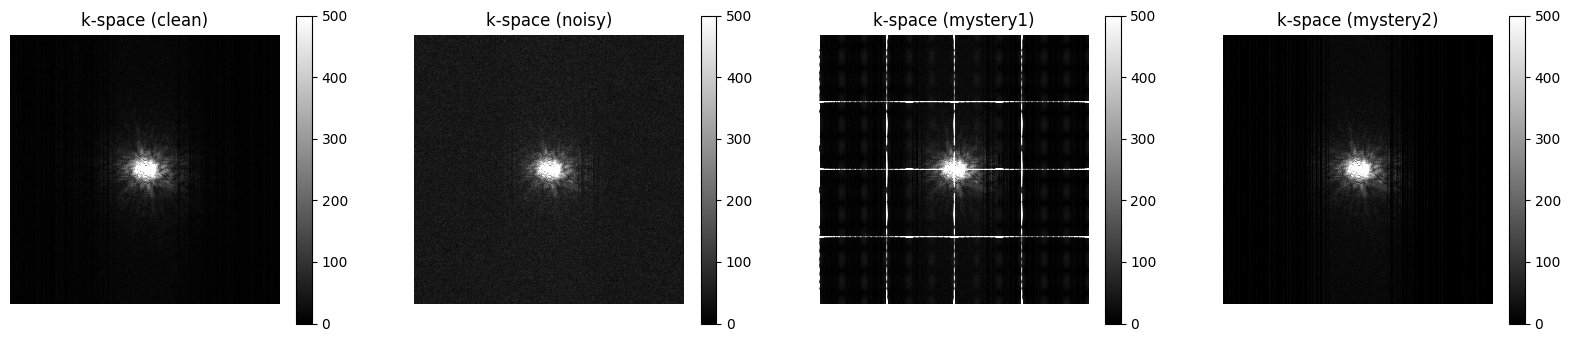

In [17]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.imshow(np.abs(kspace_clean), cmap="gray")
plt.axis('off')
plt.title("k-space (clean)")
plt.clim(0,500)
plt.colorbar()

plt.subplot(1,4,2)
plt.imshow(np.abs(kspace_noisy), cmap="gray")
plt.axis('off')
plt.title("k-space (noisy)")
plt.clim(0,500)
plt.colorbar()

plt.subplot(1,4,3)
plt.imshow(np.abs(kspace_mystery1), cmap="gray")
plt.axis('off')
plt.title("k-space (mystery1)")
plt.clim(0,500)
plt.colorbar()

plt.subplot(1,4,4)
plt.imshow(np.abs(kspace_mystery2), cmap="gray")
plt.axis('off')
plt.title("k-space (mystery2)")
plt.clim(0,500)
plt.colorbar()

ในการสร้างภาพสมองกลับมา (reconstruct) จากข้อมูลประเภท k-space เราสามารถทำได้โดยการใช้ Inverse Fast Fourier Transform (IFFT) เหมือนในฟังก์ชัน `reconstruct_image_from_kspace` ด้านล่าง

In [18]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
def reconstruct_image_from_kspace(kspace):
    return np.fft.ifft2(kspace)

**คำสั่ง** จงใช้ฟังก์ชัน `reconstruct_image_from_kspace` ในการสร้างภาพสมองกลับมา (reconstruct) ดังนี้
1. เก็บภาพสมองที่ reconstruct มาจาก `kspace_clean` ไว้ใน variable ที่ชื่อว่า `image_clean`
2. เก็บภาพสมองที่ reconstruct มาจาก `kspace_noisy` ไว้ใน variable ที่ชื่อว่า `image_noisy`
3. เก็บภาพสมองที่ reconstruct มาจาก `kspace_mystery1` ไว้ใน variable ที่ชื่อว่า `image_mystery1`
4. เก็บภาพสมองที่ reconstruct มาจาก `kspace_mystery2` ไว้ใน variable ที่ชื่อว่า `image_mystery2`

In [19]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
image_clean = reconstruct_image_from_kspace(kspace_clean)
image_noisy = reconstruct_image_from_kspace(kspace_noisy)
image_mystery1 = reconstruct_image_from_kspace(kspace_mystery1)
image_mystery2 = reconstruct_image_from_kspace(kspace_mystery2)

ผู้เข้าทดสอบสามารถลองรันโค้ด cell ถัดไปเพื่อตรวจสอบดูข้อมูลภาพสมองที่ reconstruct มาได้

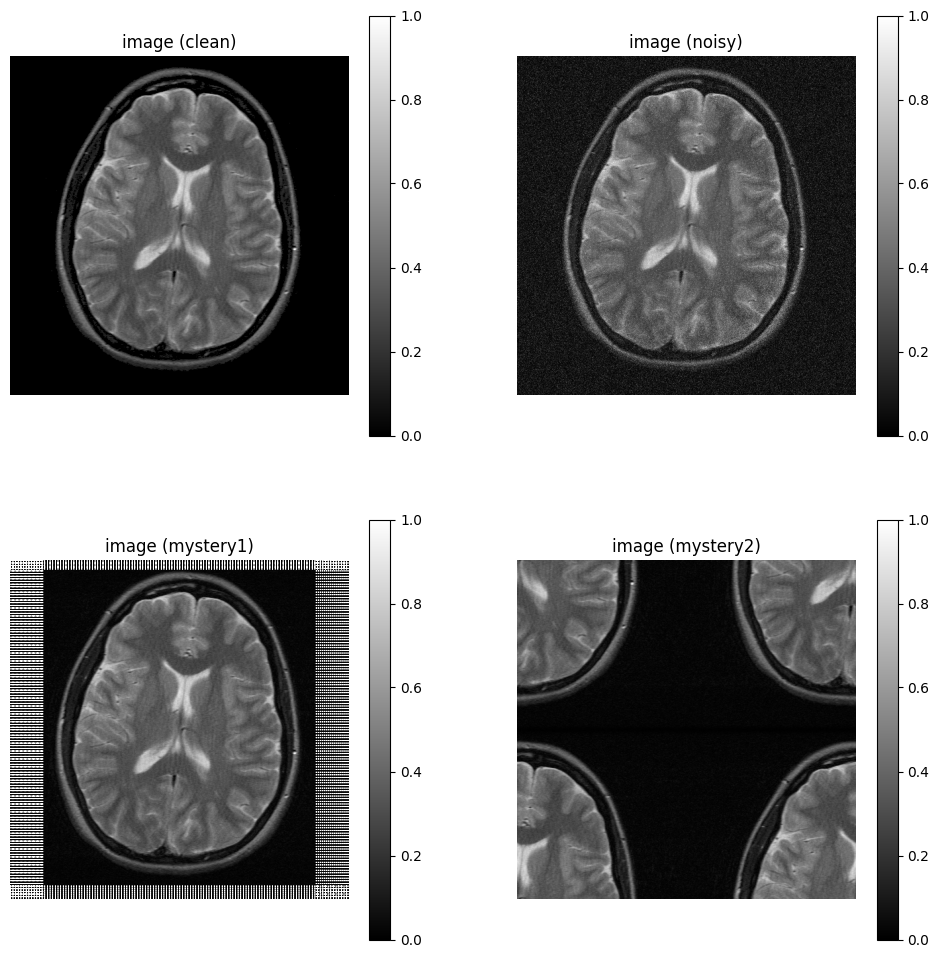

In [20]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(np.abs(image_clean), cmap="gray")
plt.axis('off')
plt.title("image (clean)")
plt.clim(0,1)
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(np.abs(image_noisy), cmap="gray")
plt.axis('off')
plt.title("image (noisy)")
plt.clim(0,1)
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(np.abs(image_mystery1), cmap="gray")
plt.axis('off')
plt.title("image (mystery1)")
plt.clim(0,1)
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(np.abs(image_mystery2), cmap="gray")
plt.axis('off')
plt.title("image (mystery2)")
plt.clim(0,1)
plt.colorbar()

หาก implement ถูกต้องเราจะพบว่าข้อมูล `image_clean` เป็นข้อมูลที่ดูมีคุณภาพสูงที่สุดและไม่มีสิ่งแปลกปลอมในภาพ ต่างจาก `image_noisy`, `image_mystery1` และ `image_mystery2`

---
หลังจากนี้ เราจะกำหนดให้ข้อมูล `image_clean` เป็น ground truth หรือข้อมูลสำหรับใช้เป็น reference ในการเปรียบเทียบคุณภาพของข้อมูล

เราสามารถลองใช้ฟังก์ชัน `compute_error` ใน cell ถัดไป เพื่อวัดความแตกต่างระหว่างข้อมูลที่เราสนใจกับ `image_clean`

In [21]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
def compute_error(image_reference, image_compare):
    return 100*np.linalg.norm(image_reference - image_compare)/np.linalg.norm(image_reference)

**คำสั่ง** จงใช้ฟังก์ชัน `compute_error` วัดความแตกต่างระหว่าง `image_noisy`, `image_mystery1` และ `image_mystery2` กับ `image_clean` โดยมีข้อกำหนดดังนี้

1. เก็บค่าความแตกต่างระหว่าง `image_noisy` กับ `image_clean` ไว้ใน variable ที่มีชื่อว่า `error_noisy`
2. เก็บค่าความแตกต่างระหว่าง `image_mystery1` กับ `image_clean` ไว้ใน variable ที่มีชื่อว่า `error_mystery1`
3. เก็บค่าความแตกต่างระหว่าง `image_mystery2` กับ `image_clean` ไว้ใน variable ที่มีชื่อว่า `error_mystery2`

In [22]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
error_noisy = compute_error(image_clean, image_noisy)
error_mystery1 = compute_error(image_clean, image_mystery1)
error_mystery2 = compute_error(image_clean, image_mystery2)

In [23]:
# ผู้เข้าทดสอบสามารถใช้ code นี้ในการดูผล
print(f"error (noisy) = {error_noisy}")
print(f"error (mystery1) = {error_mystery1}")
print(f"error (mystery2) = {error_mystery2}")

error (noisy) = 38.64667856510635
error (mystery1) = 311.00599237182473
error (mystery2) = 135.4865867887933


**คำถาม**

ถ้าดูจาก error ที่ได้รับจากฟังก์ชัน `compute_error` แล้ว reconstructed data อันไหนมีความสอดคล้องกับ `image_clean` มากที่สุด
<br>

1. `image_noisy`
2. `image_mystery1`
3. `image_mystery2`

In [24]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้

MRI_QA_answ = [1] # <- ตอบคำถามของท่านลงใน [] ที่นี่

# ถ้าต้องการตอบว่าตัวเลือก 1 ถูกต้องที่สุด -> ให้ใส่คำตอบเป็น MRI_QA_answ = [1]

ในการทำงานจริง เราจะมักจะวัดผลความแตกต่างเฉพาะบริเวณที่เราสนใจในภาพ เช่น บริเวณภายในศีรษะ หรือภายในสมอง เราจะไม่ได้วัดความแตกต่างในทุกบริเวณในภาพเหมือนที่เพิ่งได้ทำใน cell ก่อนหน้า

หนึ่งในวิธีที่ถูกใช้มากในการวัดผลเฉพาะบริเวณที่สนใจ คือการสร้าง binary mask (มีค่าเป็น  1 ในบริเวณที่สนใจ และมีค่าเป็น 0 ในบริเวณที่ไม่สนใจ) มาก่อน เหมือนในข้อสอบ Part 1 ด้านบน แล้วนำเอา binary mask ที่สร้างขึ้นมาใช้ร่วมกับฟังก์ชัน `compute_error`

**คำสั่ง** จงเขียนฟังก์ชันชื่อว่า `get_head_mask` ที่รับ parameter เป็น `image_clean` และ return ตัว binary mask ที่ได้สร้างขึ้น โดยมีข้อกำหนดดังนี้

- สำหรับโจทย์ข้อนี้ ทีมงานกำหนดให้บริเวณที่เราสนใจคือ บริเวณของ `image_clean` ที่อยู่ในศีรษะ **และ** ต้องเป็นบริเวณที่มีค่า pixel ใน `image_clean` ไม่เท่ากับ 0
- ทีมงานเข้าใจว่าการสร้าง `head_mask` ที่ perfect นั้นเป็นเรื่องที่ค่อนข้างยาก ทีมงานขอให้ผู้สอบทดลองสร้าง `head_mask` ให้ดีที่สุดเท่าที่ทำได้ โดยขอให้เขียน comment อธิบายหลักการในการสร้าง `head_mask` ของท่านคร่าว ๆ ในโค้ดด้วย รวมถึงอธิบายว่าท่านเช็คอย่างไรว่า `head_mask` ที่สร้างขึ้นมันสมเหตุสมผล

In [25]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
def get_head_mask(image_clean): # ห้ามแก้โค้ดบรรทัดนี้
    import cv2 #import library cv2 เพื่อทำ image processing

    #เตรียมข้อมูลให้พร้อมสำหรับการทำ image processing
    image_abs = np.abs(image_clean) #แปลงข้อมูลของ image_clean ที่เป็นจำนวนเชิงซ้อน(complex128) ให้เป็นจำนวนจริง(float64)
    image8 = (image_abs * 255).astype('uint8') #image_abs มามีค่า 0-1 แปลงให้มีค่า 0-255 และมี dtype('uint8')
    #image8 เป็น numpy array 2 มิติ ขนาด 512x512 มีค่าภายในเป็นจำนวนเต็มตั้งแต่ 0 ถึง 255, Graycale image

    #เริ่มกระบวนการ image processing:
    #1. ทำการ thresholding คือการแยกส่วนประกอบของภาพ หลักการ pixel ใดที่มีค่า 50-255 จะกลายเป็นสีขาว(255) นอกนั้นจะกลายเป็นสีดำ(0)
    thresh, thresh50 = cv2.threshold(image8, 50, 255, cv2.THRESH_BINARY)

    #2. สร้าง kernal เป็น numpy array 1 ทีมี 2 มิติ, ขนาด 3x3
    kernel = np.ones((3,3), np.uint8)

    #3. การขยายภาพ: Dilation morphology จะขยายภาพและเพิ่มความสว่างของวัตถุโดยใช้พื้นที่ใกล้เคียงสูงสุด
    dilation = cv2.dilate(thresh50, kernel, iterations=2)

    #4. opening morphology: กำจัดสัญญาณรบกวนในรูปร่างและโครงสร้างของภาพ
    opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel, iterations=9)

    #ภาพที่ได้เป็นมีค่าแค่ 0(สีดำ) และ 255(สีขาว)
    #ทำการแปลงค่าสีขาว 255 -> 1 โดยการวนลูป
    head_mask = opening
    for x in range(head_mask.shape[0]):
      for y in range(head_mask.shape[1]):
        if image_clean[x, y] == 255:
          head_mask[x, y] = 1
    #การหาค่า treshold, kernal, iterations of dilation, iteration of opening
    #เกิดจากการสุ่มค่า แล้วลองรัน พิจารณาจากภาพให้ใกล้เคียงกับที่ต้องการได้
    return head_mask # ห้ามแก้โค้ดบรรทัดนี้

เรียกใช้ `get_head_mask` เพื่อสร้าง binary mask มาเก็บไว้ใน variable ที่มีชื่อว่า `head_mask`

In [26]:
# ผู้ทดสอบสามารถรัน cell นี้ได้เลย ไม่ต้องปรับแก้อะไร
head_mask = get_head_mask(image_clean)

In [27]:
#สร้าง image_with_headmask จาก image_clean เอาเฉพาะ pixel ในตำแหน่งที่ head_mask ==1
image_with_headmask = image_clean.copy()
for x in range(head_mask.shape[0]):
  for y in range(head_mask.shape[1]):
    if head_mask[x, y] == 0:
      image_with_headmask[x, y] = 0

([], [])

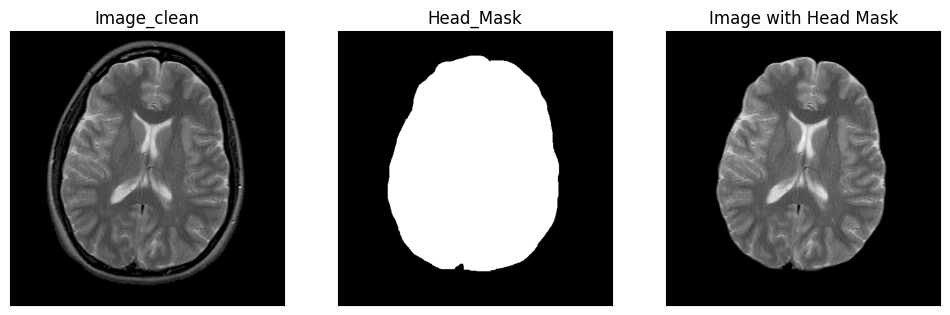

In [28]:
#สร้างรูป image_clean, head_mask, image with head mask เพื่อเปรียบเทียบกัน
plt.figure(figsize=(12,12))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(image_clean), cmap='gray')
plt.title('Image_clean')
plt.xticks([])
plt.yticks([])


plt.subplot(1, 3, 2)
plt.imshow(head_mask, cmap='gray')
plt.title('Head_Mask')
plt.xticks([])
plt.yticks([])


plt.subplot(1, 3, 3)
plt.imshow(np.abs(image_with_headmask), cmap='gray')
plt.title('Image with Head Mask')
plt.xticks([])
plt.yticks([])

**คำสั่ง** จงเขียนฟังก์ชันชื่อว่า `compute_error_within_mask` ที่รับ parameters เป็น `image_reference`, `image_compare` และ `mask`

โดยจะ return ค่า error ด้วยวิธีคิดเดียวกับที่คิดในฟังก์ชัน `compute_error` แต่จะคิดเฉพาะในบริเวณที่เราสนใจตามที่ได้ระบุไว้ด้วยเลข 1 ใน `mask` เท่านั้น

In [29]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
def compute_error_within_mask(image_reference, image_compare, mask): # ห้ามแก้โค้ดบรรทัดนี้
  for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
      if mask[i, j] == 0:
        image_reference[i, j] = 0
        image_compare[i, j] = 0
  error = 100*np.linalg.norm(image_reference - image_compare)/np.linalg.norm(image_reference)

  return error # ห้ามแก้โค้ดบรรทัดนี้

**คำสั่ง** จงใช้ฟังก์ชัน `compute_error_within_mask` ที่ท่านเขียนขึ้น
1. เก็บค่าความแตกต่างระหว่าง `image_noisy` กับ `image_clean` ในบริเวณที่ถูกกำหนดไว้ด้วย `head_mask` ไว้ใน variable ที่มีชื่อว่า `error_noisy_head`
2. เก็บค่าความแตกต่างระหว่าง `image_mystery1` กับ `image_clean` ในบริเวณที่ถูกกำหนดไว้ด้วย `head_mask` ไว้ใน variable ที่มีชื่อว่า `error_mystery1_head`

In [30]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้
error_noisy_head = compute_error_within_mask(image_clean, image_noisy, head_mask)
error_mystery1_head = compute_error_within_mask(image_clean, image_mystery1, head_mask)

In [31]:
# ผู้เข้าทดสอบสามารถใช้ code ด้านล่างนี้ในการทดสอบฟังก์ชันของท่าน
print(f"In-head error (noisy) = {error_noisy_head}")
print(f"In-head error (mystery1) = {error_mystery1_head}")

In-head error (noisy) = 24.641519376908533
In-head error (mystery1) = 2.025725182426993


**คำถาม**

ถ้าดูจาก error ที่ได้รับจากฟังก์ชัน `compute_error_within_mask` แล้ว reconstructed data อันไหนมีความสอดคล้องกับ `image_clean` มากที่สุด
<br>

1. `image_noisy`
2. `image_mystery1`

In [32]:
# ผู้เข้าทดสอบสามารถแก้โค้ดใน cell นี้ได้

MRI_QB_answ = [2] # <- ตอบคำถามของท่านลงใน [] ที่นี่

# ถ้าต้องการตอบว่าตัวเลือก 1 ถูกต้องที่สุด -> ให้ใส่คำตอบเป็น MRI_QB_answ = [1]

---

# สิ้นสุดข้อสอบสำหรับทดสอบทักษะการเขียนโปรแกรมสำหรับสำรวจข้อมูล MRI

จงตรวจสอบให้มั่นใจก่อนส่งอีกทีว่า
1. เราสามารถรันทั้งไฟล์ (เช่น การกด tab ใน Google Colab ที่ชื่อว่า Runtime -> Restart and run all) ได้โดยไม่ติด error ใด ๆ
    *   ถ้าหากพบ error ที่ cell ไหน cell นั้นและ cell หลังจากนั้นทั้งหมด จะได้รับคะแนนเป็น 0 ทันที
        * error ในที่นี้ รวมถึง ModuleNotFoundError ด้วย ดังนั้น อย่าลืม import modules ที่ใช้มาด้วย
2. เมื่อรันครบทั้งไฟล์ variables ทั้งหมดที่ท่านได้ถูกสร้างขึ้นในคำสั่งทั้งหมดยังคงอยู่ใน workspace ของท่าน (ไม่ได้ถูก overwrite หรือถูกลบทิ้งไป)
    * ตัวอย่าง variables ที่ถูกสร้างขึ้นตามคำสั่งในแบบทดสอบนี้ คือ `image_TSE`, `brain_mask`, `min_TSE`, ..., `error_mystery2_head`, `MRI_QB_answ`

    ท่านสามารถใช้ cell ถัดไปในการเช็คได้

In [33]:
for curr_var in ['image_TSE', 'brain_mask','min_TSE','max_TSE','min_brain_mask','max_brain_mask','num_rows_TSE','num_cols_TSE','num_rows_brain_mask','num_cols_brain_mask','mean_TSE','mean_TSE_in_brain','error_noisy','error_mystery1','error_mystery2','MRI_QA_answ','error_noisy_head','error_mystery1_head','MRI_QB_answ']:
    if not (curr_var in globals()):
        print(f"{curr_var} not found! Make sure that it exists in globals()")